In [1]:
import pandas as pd

In [3]:
df=pd.read_excel(r"/content/glass.xlsx",sheet_name='glass')

In [4]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
df.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


In [7]:
df[df.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [8]:
df.drop_duplicates(keep='first',ignore_index=True,inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      213 non-null    float64
 1   Na      213 non-null    float64
 2   Mg      213 non-null    float64
 3   Al      213 non-null    float64
 4   Si      213 non-null    float64
 5   K       213 non-null    float64
 6   Ca      213 non-null    float64
 7   Ba      213 non-null    float64
 8   Fe      213 non-null    float64
 9   Type    213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [11]:
df['Type'].unique()

array([1, 2, 3, 5, 6, 7])

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

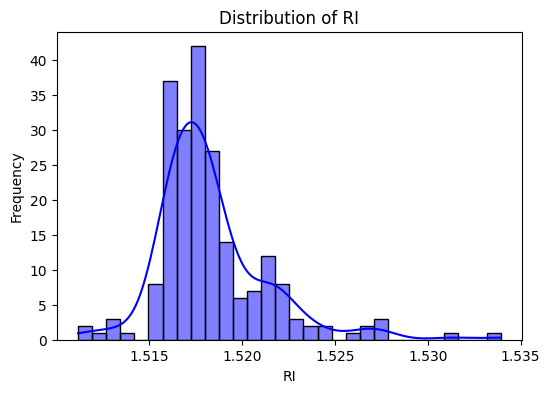

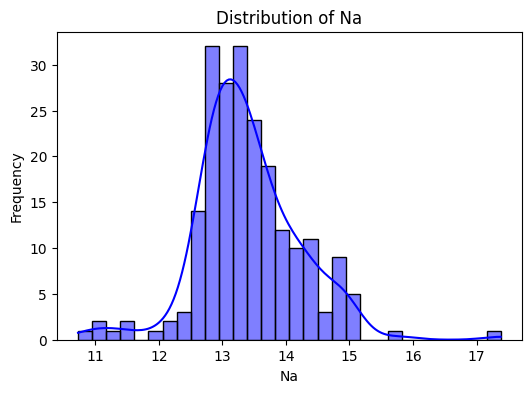

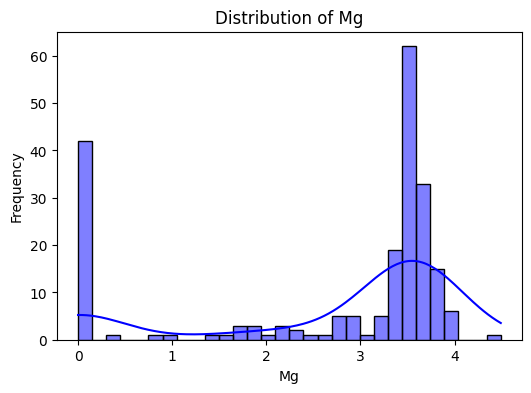

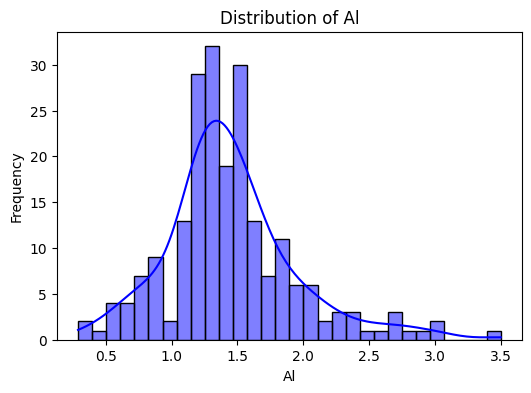

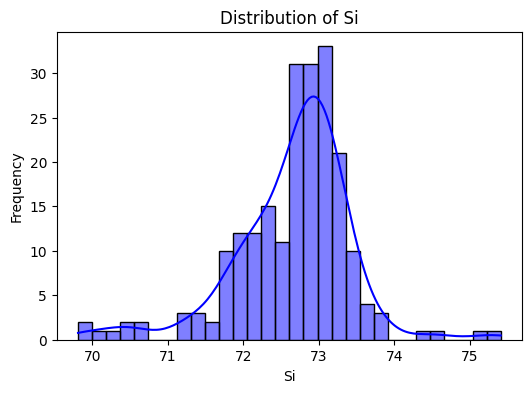

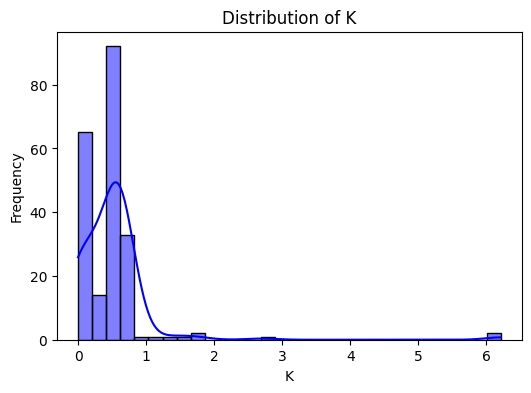

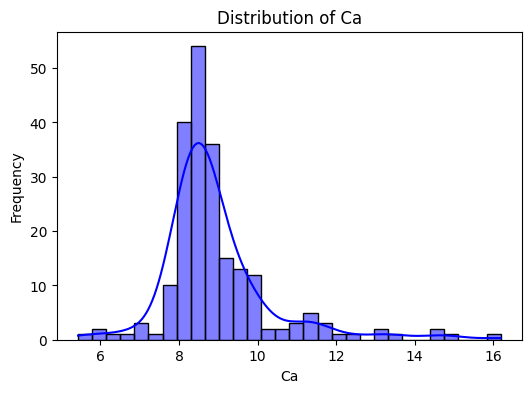

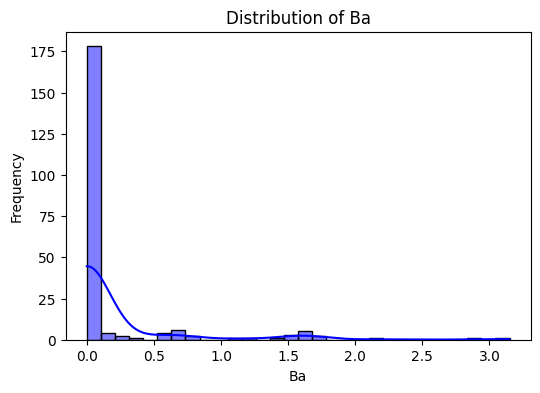

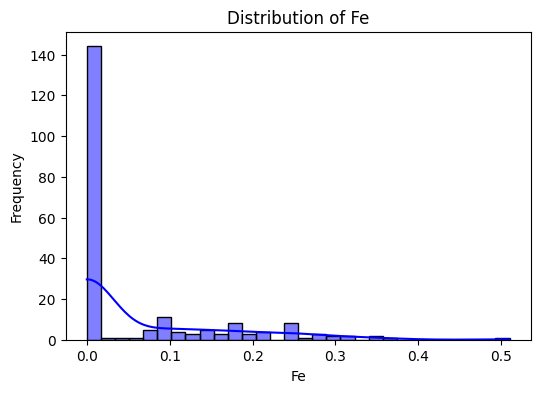

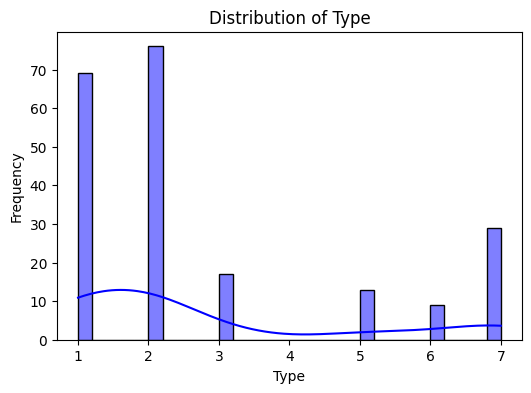

In [13]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Histograms
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

(array([[213.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0., 210.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [213.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [213.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 213.],
        [213.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  9., 203.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [213.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [213.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [213.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([ 0.   ,  7.541, 15.082, 22.623, 30.164, 37.705, 45.246, 52.787,
        60.328, 67.869, 75.41 ]),
 <a list of 10 BarContainer objects>)

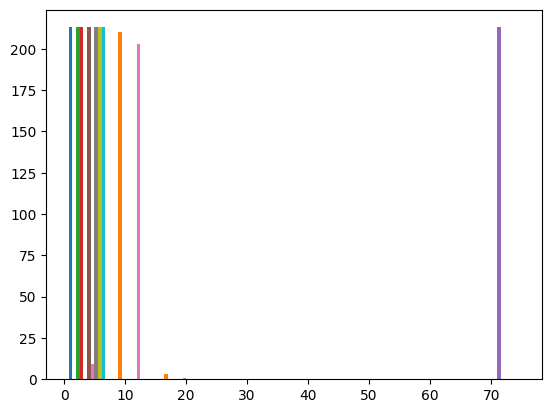

In [14]:
plt.hist(df,bins=10)

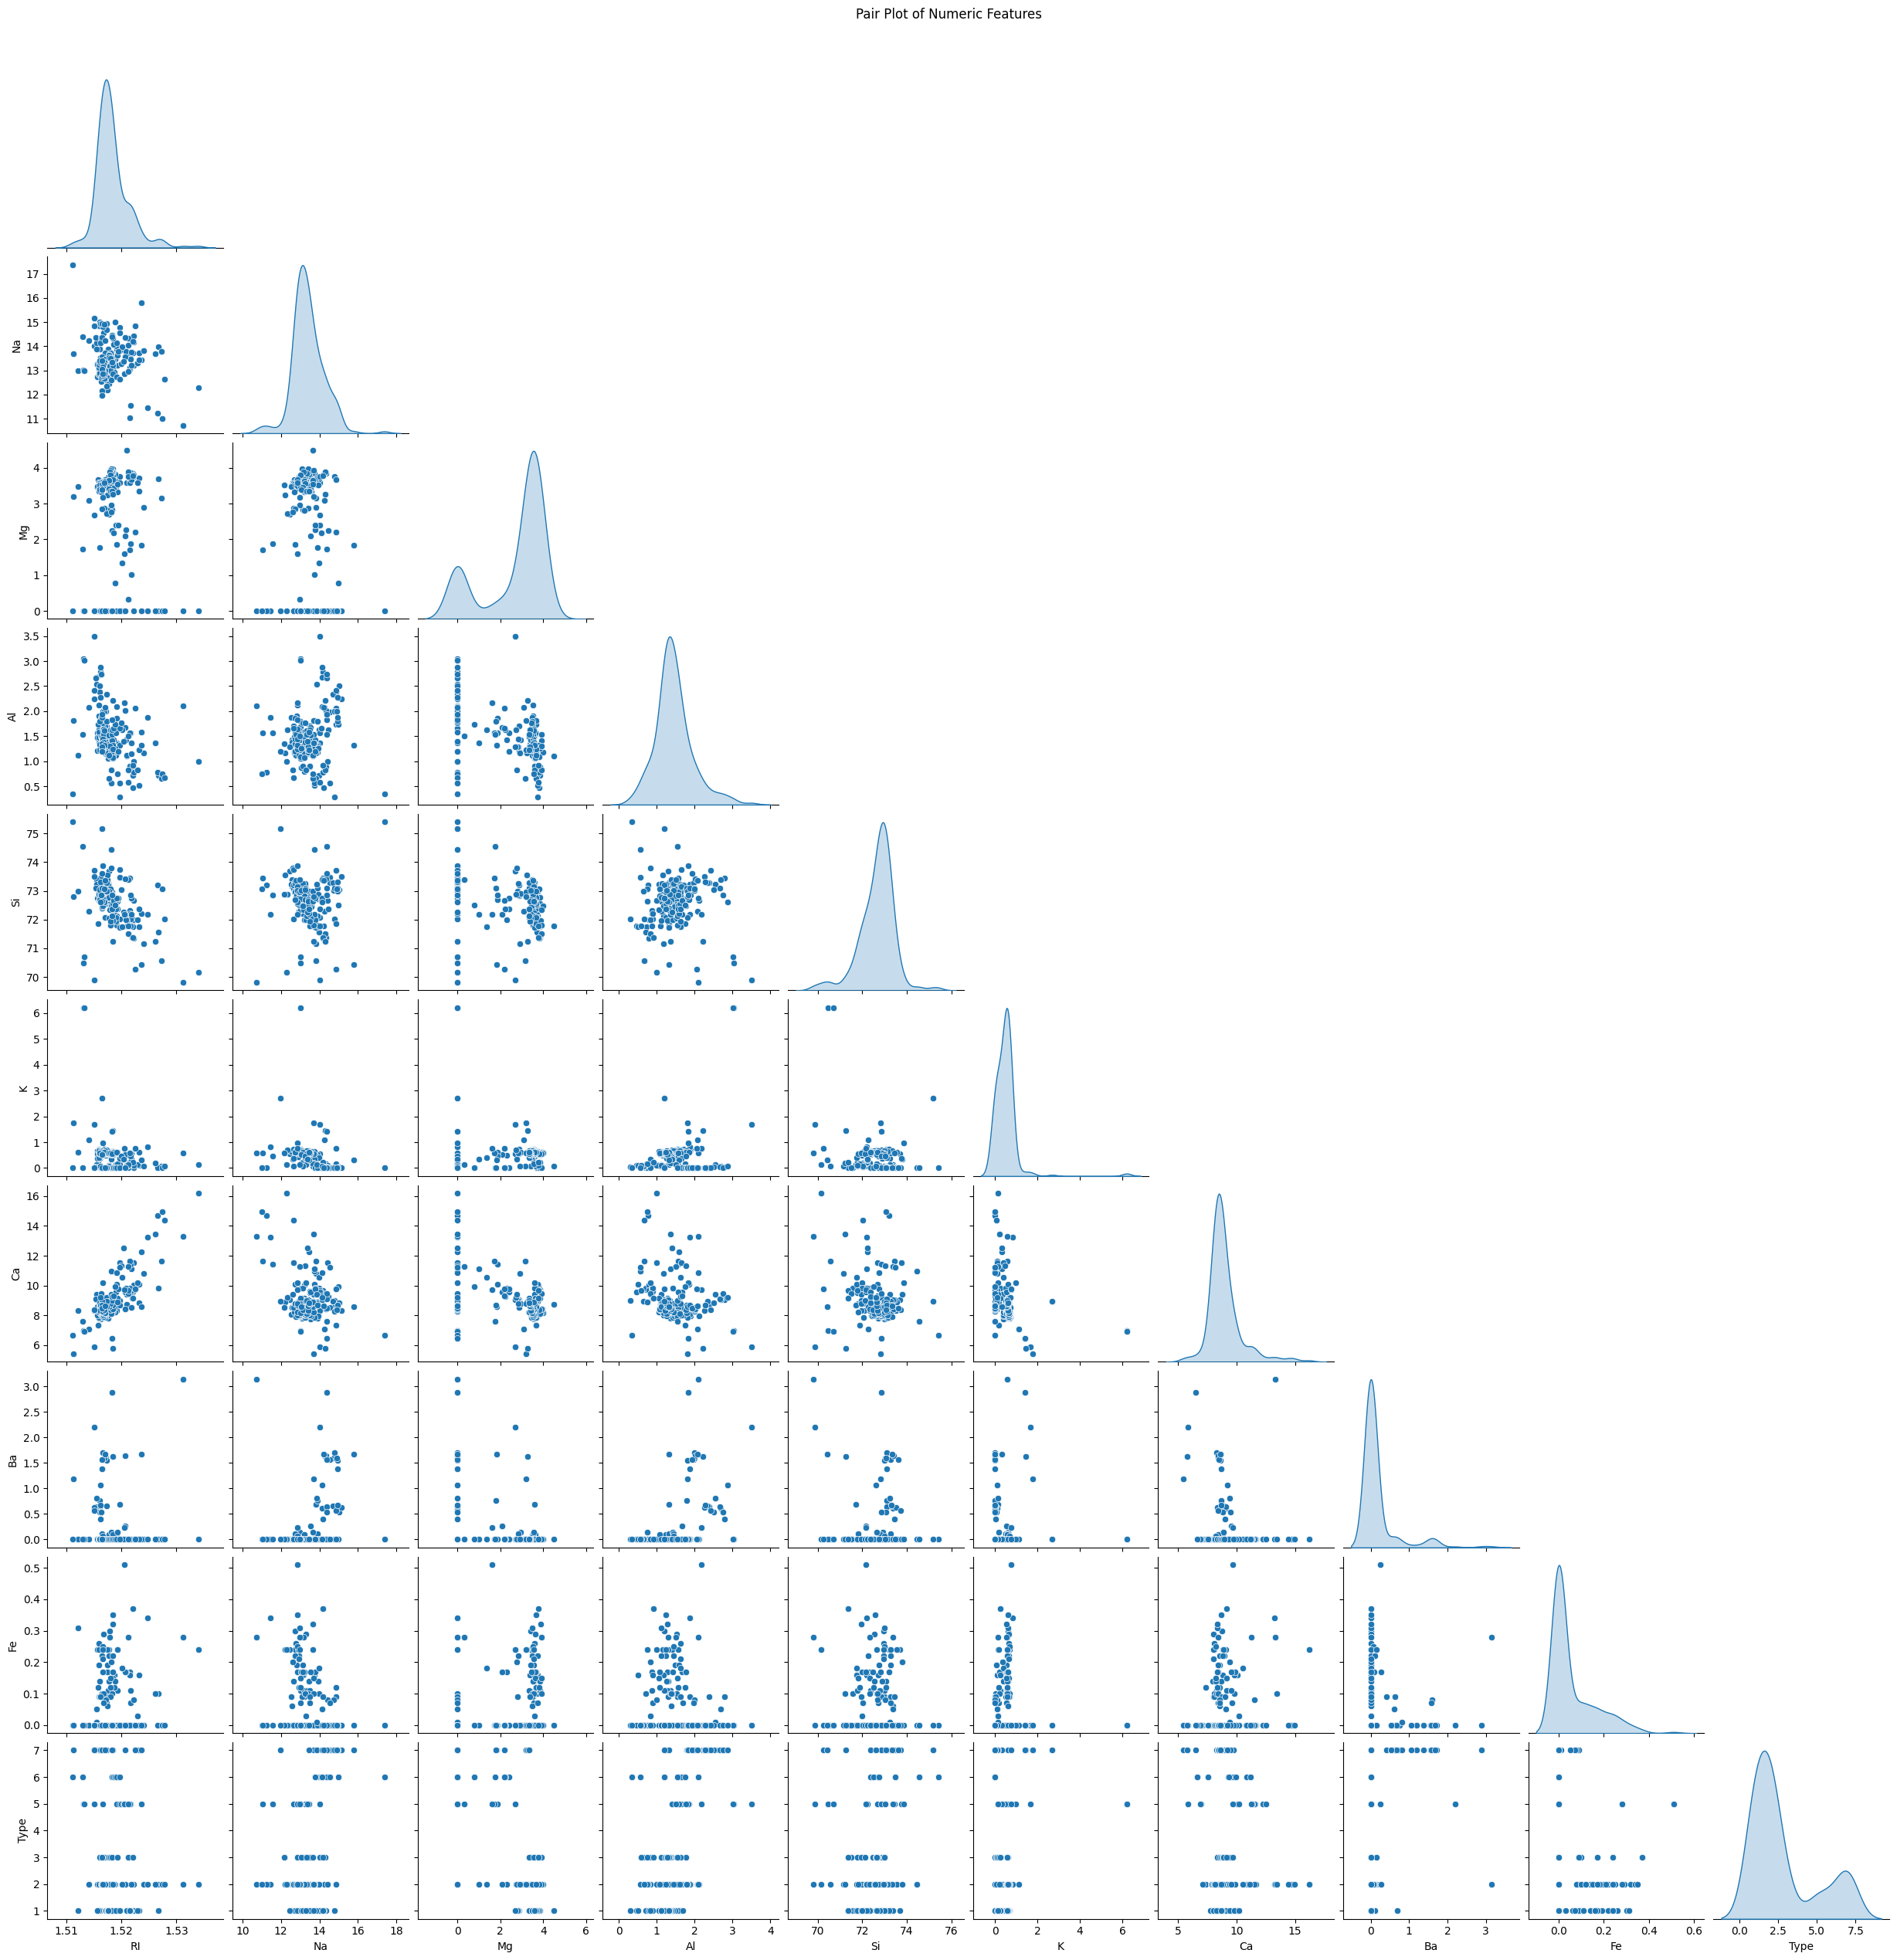

In [15]:
# Pair Plot
sns.pairplot(df[numeric_cols], diag_kind='kde', corner=True)
plt.suptitle('Pair Plot of Numeric Features', y=1.02)
plt.show()


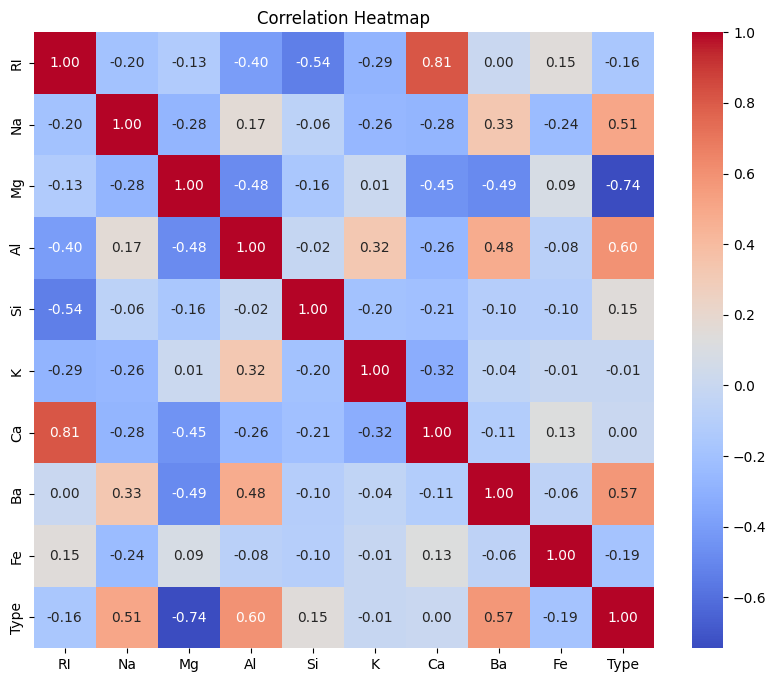

In [16]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#General Observations:
#The heatmap displays the pairwise correlation coefficients between the variables in the dataset.
#Correlation values range from -1 to 1:
#A value of 1 indicates a perfect positive linear relationship.
#A value of -1 indicates a perfect negative linear relationship.
#A value near 0 indicates no linear relationship.
#Strong Positive Correlations:
#RI and Ca (0.81): A strong positive correlation, indicating that as the Refractive Index (RI) increases, the Calcium (Ca) content tends to increase as well.
#Type and Ba (0.57): The variable Type is positively correlated with Barium (Ba), suggesting that certain types may have higher Ba content.
#Type and Al (0.60): A moderate positive correlation exists between Type and Aluminum (Al), indicating an association between these features.
#strong Negative Correlations:
#Type and Mg (-0.74): A strong negative correlation indicates that higher Magnesium (Mg) levels are associated with certain types that have lower Type values.
#RI and Si (-0.54): A significant negative correlation implies that as RI increases, Silicon (Si) tends to decrease.
#Weak Correlations:
#Many variables, such as K, Fe, and Si, show weak or negligible correlations with Type, suggesting limited linear relationships.
#Features like Na and Mg show weak correlations with most other features.


In [18]:
x=df.drop('Type',axis=1)
y=df[['Type']]

In [19]:
x.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier



In [21]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)


In [22]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


In [23]:
rf_model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [24]:
y_pred = rf_model.predict(X_test)

In [25]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


In [26]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.81
Precision: 0.82
Recall: 0.81
F1-score: 0.80

Classification Report:

              precision    recall  f1-score   support

           1       0.83      0.95      0.89        21
           2       0.79      0.83      0.81        23
           3       1.00      0.40      0.57         5
           5       0.33      0.25      0.29         4
           6       0.67      1.00      0.80         2
           7       1.00      0.89      0.94         9

    accuracy                           0.81        64
   macro avg       0.77      0.72      0.72        64
weighted avg       0.82      0.81      0.80        64



In [ ]:
 #The Random Forest Algorithm Output
#Overall Performance:
#Accuracy: 0.81 indicates that the model correctly classifies 81% of the test samples.
#The weighted average F1-score of 0.80 suggests a good balance between precision and recall across all classes.
#2)Class-wise Performance:
#Class 1:
#Precision: 0.83, Recall: 0.95, F1-score: 0.89
#The model performs well in identifying instances of Class 1, with very few false negatives.
#Class 2:
#Precision: 0.79, Recall: 0.83, F1-score: 0.81
#Decent performance, though slightly more false negatives or misclassifications compared to Class 1.
#Class 3:
#Precision: 1.00, Recall: 0.40, F1-score: 0.57
#The model is highly precise in predicting Class 3, but recall is poor, meaning it misses many actual instances of Class 3.
#Class 5:
#Precision: 0.33, Recall: 0.25, F1-score: 0.29
#Poor performance for Class 5, indicating significant misclassifications.
#Class 6:
#Precision: 0.67, Recall: 1.00, F1-score: 0.80
#Good recall but slightly lower precision, suggesting it predicts this class even when it may not be correct.
#Class 7:
#Precision: 1.00, Recall: 0.89, F1-score: 0.94
#Excellent performance, with high precision and recall.
#Macro Average:
#Precision: 0.77, Recall: 0.72, F1-score: 0.72
#The macro average gives equal weight to all classes, indicating lower performance on underrepresented classes (e.g., Class 5 and Class 3).
#Weighted Average:
#Precision: 0.82, Recall: 0.81, F1-score: 0.80
#The weighted average accounts for the class distribution, which explains the higher scores compared to the macro average. This is skewed toward better-represented classes like Class 1 and Class 2.



<ipython-input-28-7e9475283ba7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')


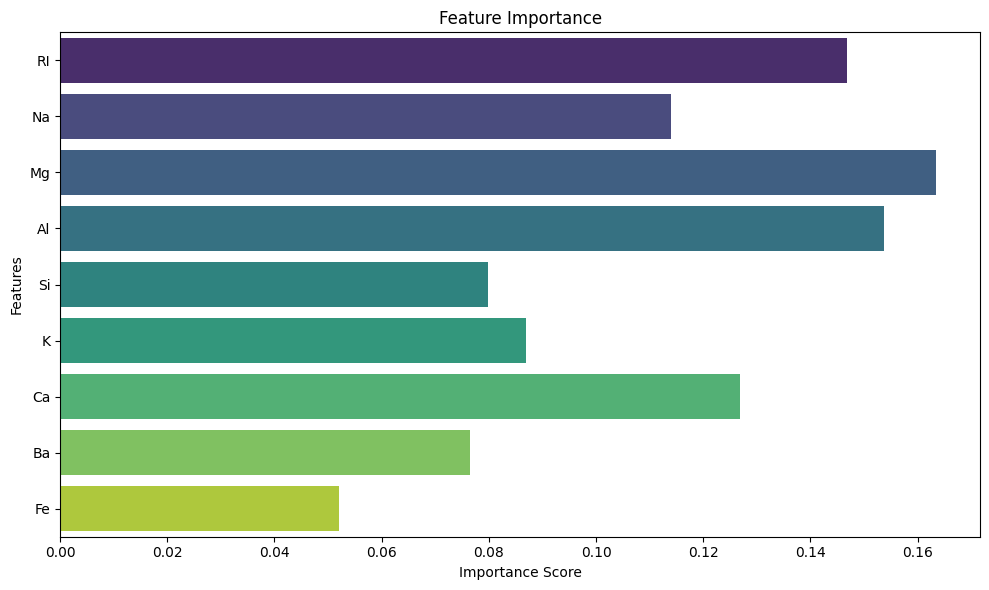

In [28]:
feature_importances = pd.Series(rf_model.feature_importances_, index=x.columns)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [ ]:
#Top Features:

#The RI (Refractive Index) and Mg (Magnesium) features have the highest importance scores, indicating they contribute the most to the model's predictive power.
#Na (Sodium) and Al (Aluminum) also show significant importance but slightly less compared to RI and Mg.
#Moderate Features:
#Features such as Si (Silicon), K (Potassium), and Ca (Calcium) have moderate importance, suggesting they play a smaller but still relevant role in the model.
#Least Important Features:
#The Fe (Iron) feature has the lowest importance score, implying it has minimal impact on the predictions made by the model.
#Ba (Barium) also ranks relatively low in importance compared to the top features.
#Insights:
#The visualization highlights which features the model relies on most heavily for making decisions.
#Features with high importance may warrant further investigation or domain analysis to understand their impact.
#Low-importance features might be considered for removal to simplify the model, provided their removal does not degrade performance significantly.


In [31]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1


In [29]:
bagging_model = RandomForestClassifier(n_estimators=100, random_state=42)
bagging_model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [33]:
bagging_metrics = evaluate_model(bagging_model, X_test, y_test)
print("Bagging (Random Forest) Results:")
print(f"Accuracy: {bagging_metrics[0]:.2f}")
print(f"Precision: {bagging_metrics[1]:.2f}")
print(f"Recall: {bagging_metrics[2]:.2f}")
print(f"F1-score: {bagging_metrics[3]:.2f}")
print("\nClassification Report:\n")
print(classification_report(y_test, bagging_model.predict(X_test)))


Bagging (Random Forest) Results:
Accuracy: 0.81
Precision: 0.82
Recall: 0.81
F1-score: 0.80

Classification Report:

              precision    recall  f1-score   support

           1       0.83      0.95      0.89        21
           2       0.79      0.83      0.81        23
           3       1.00      0.40      0.57         5
           5       0.33      0.25      0.29         4
           6       0.67      1.00      0.80         2
           7       1.00      0.89      0.94         9

    accuracy                           0.81        64
   macro avg       0.77      0.72      0.72        64
weighted avg       0.82      0.81      0.80        64



In [36]:
boosting_model = AdaBoostClassifier(n_estimators=100, random_state=42)
boosting_model.fit(X_train, y_train)

boosting_metrics = evaluate_model(boosting_model, X_test, y_test)
print("\nBoosting (AdaBoost) Results:")
print(f"Accuracy: {boosting_metrics[0]:.2f}")
print(f"Precision: {boosting_metrics[1]:.2f}")
print(f"Recall: {boosting_metrics[2]:.2f}")
print(f"F1-score: {boosting_metrics[3]:.2f}")
print("\nClassification Report:\n")
print(classification_report(y_test, boosting_model.predict(X_test)))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Boosting (AdaBoost) Results:
Accuracy: 0.25
Precision: 0.22
Recall: 0.25
F1-score: 0.21

Classification Report:

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        21
           2       0.32      0.30      0.31        23
           3       0.12      0.80      0.21         5
           5       0.00      0.00      0.00         4
           6       0.50      1.00      0.67         2
           7       0.60      0.33      0.43         9

    accuracy                           0.25        64
   macro avg       0.26      0.41      0.27        64
weighted avg       0.22      0.25      0.21        64



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

In [ ]:
#Inference for Boosting (AdaBoost) Results
#Overall Performance:
#Accuracy (0.25): The model correctly predicts only 25% of the test samples, indicating poor performance overall.
#Precision (0.22), Recall (0.25), and F1-score (0.21) are all low, reflecting challenges in making accurate predictions.
#Class-wise Performance:
#Class 1:
#Precision: 0.00, Recall: 0.00, F1-score: 0.00
#The model fails completely for Class 1, misclassifying all instances.
#Class 2:
#Precision: 0.32, Recall: 0.30, F1-score: 0.31
#Slightly better but still poor performance with many false positives and false negatives.
#Class 3:
#Precision: 0.12, Recall: 0.80, F1-score: 0.21
#High recall but very low precision, indicating the model frequently misclassifies other classes as Class 3.
#Class 5:
#Precision: 0.00, Recall: 0.00, F1-score: 0.00
#Similar to Class 1, the model entirely fails to predict this class.
#Class 6:
#Precision: 0.50, Recall: 1.00, F1-score: 0.67
#Perfect recall indicates all instances of Class 6 are identified, but moderate precision shows some false positives.
#Class 7:
#Precision: 0.60, Recall: 0.33, F1-score: 0.43
#Decent precision but low recall, indicating the model misses many true instances of Class 7.
#Averages:
#Macro Average:
#Precision: 0.26, Recall: 0.41, F1-score: 0.27
#The macro average gives equal weight to all classes, reflecting the significant struggles in most classes.
#Weighted Average:
#Precision: 0.22, Recall: 0.25, F1-score: 0.21
#Weighted averages are low due to the poor performance on the majority of classes.
#Observations:
#The model struggles with most classes, especially the dominant ones like Class 1 and Class 5.
#The performance on Class 6 is relatively good, with perfect recall and acceptable precision, but this is likely due to the small sample size and simplicity in distinguishing this class.
#The high recall but low precision for Class 3 suggests the model is biased toward predicting this class even when uncertain.


In [ ]:
#Comparison with Bagging:

#The Bagging (Random Forest) model performed significantly better than AdaBoost, achieving an accuracy of 0.81 compared to 0.25.
#Bagging is better suited for this dataset, as it manages variance effectively, while AdaBoost may overfit noisy or difficult-to-predict data points.